# Assignment 1: Competitive learning on the MNIST database

In [7]:
import numpy as np
import numpy.matlib
import math
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

#### Load the data set

In [8]:
train = np.genfromtxt ('letters.csv', delimiter=",")
trainlabels = np.genfromtxt ('letterslabels.csv', delimiter=",")

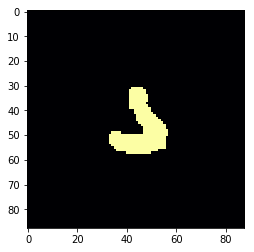

In [9]:
# Number of pixels and number of training data
[n,m]  = np.shape(train)                    
pix = int(math.sqrt(n))
image = np.reshape(train[:,0],(pix,pix),order="F")
plt.imshow(image, cmap = 'inferno');

#### Parameters and variables 

In [10]:
# Number of pixels and number of training data
[n,m] = np.shape(train)                    

# Learning rate
eta = 0.2

# Parameter controlling magnitude of initial conditions
winit = 1                                  
alpha = 0.999

tmax = 7000
neurons = 25

# Normalised input 
normT = np.sqrt(np.diag(train.T.dot(train)))
train = train / np.matlib.repmat(normT.T,n,1)

W = winit * np.random.rand(neurons,n)

# Weight matrix (rows = output neurons, cols = input neurons)
normW = np.sqrt(np.diag(W.dot(W.T)))

# Reshape normW into a numpy 2d array
normW = normW.reshape(neurons,-1)            

normTrain = numpy.linalg.norm(W[1,:])
# Normalise using repmat
W = W / np.matlib.repmat(normW.T,n,1).T    

# Counter for the winner neurons
counter = np.zeros((1,neurons))
# Running avg of the weight change over time
wCount = np.ones((1,tmax+1)) * 0.25         

In [11]:
neighbours = True
leakylearning = True
harmonicDecay = True
noiseAddition = True
freqSens = True

####  Implementation, training and output

In [12]:
for t in range(1,tmax):
    # Get a randomly generated index in the input range
    i = math.ceil(m * np.random.rand())-1   

    # Pick a training instance using the random index
    x = train[:,i]                          
    
    # Get output firing
    h = (W.dot(x)/neurons)
    # Reshape h into a numpy 2d array
    h = h.reshape(h.shape[0],-1)   
    
    # The frequency sensitive competitive algorithm
    if freqSens:
        for i in range(neurons):
            h[i,:] *= t/counter[0,i] 
        
    # Noise addition on the weights.
    noise = 0
    if noiseAddition:
        noise = np.random.rand(neurons,1)/200

    # Get the max in the output firing vector
    output = np.max(h+noise)  
    # Get the index of the firing/winning neuron
    k = np.argmax(h+noise)                        

    # Increment counter for winner neuron
    counter[0,k] += 1              
    
    # Linear Decay
#     endEta = eta * 1
#     newEta = eta - (eta - endEta)*(t/tmax)
#     decayedEta = newEta
    
    # Harmonic Decay
    if harmonicDecay:
        eta = 1 / counter[0,k]
        decayedEta = eta
    
    # Calculate the change in weights for the k-th output neuron
    # Get closer to the input (x - W)
    dw = decayedEta * (x.T - W[k,:])        

    # % weight change over time (running avg)
    wCount[0,t] = wCount[0,t-1] * (alpha + dw.dot(dw.T)*(1-alpha)) 

    # Weights for k-th output are updated
    W[k,:] += dw                    

    # Update the winners and neighbouring losers.
    if neighbours:
        left, right = -1, -1
        if k > 0:
            left = k - 1
            W[left,:] += 0.00002 * decayedEta * (x.T - W[left,:])  
        if k < neurons - 1:
            right = k + 1
            W[right,:] += 0.00002 * decayedEta * (x.T - W[right,:])  

    # Leaky learning: update the weights of the losers as well as winners but with a much smaller learning rate
    if leakylearning:
        for j in range(neurons):
            if j != k and j != left and j != right: 
                W[j,:] += 0.0000001 * (x.T - W[j,:]) 

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in double_scalars
  app.launch_new_instance()


In [13]:
# Find the dead units and store their index and value
deadUnits = []
deadUnitsIndex = []
for c,v in enumerate(counter[0]):
    if v <= (tmax * 0.01):
        deadUnits.append(v)
        deadUnitsIndex.append(c)
print(deadUnitsIndex)

[]


In [14]:
# Print standart devition and mean
print("{:.0f}".format(np.std(counter[0])))
print("{:.0f}".format(np.mean(counter[0])))

29
280


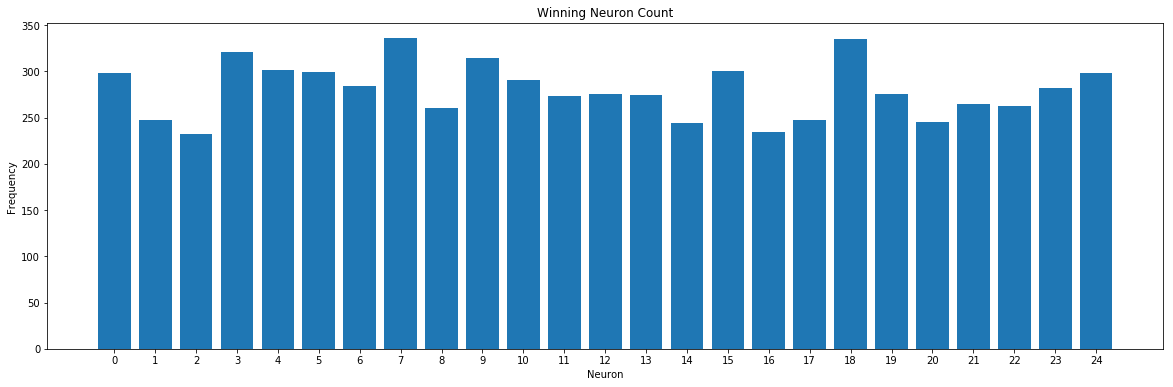

In [15]:
# Display the winning count in the histogram format of each neuron
a = counter[0]
plt.figure(figsize=(20, 6))

plt.title("Winning Neuron Count")
plt.xlabel("Neuron")
plt.ylabel("Frequency")

plt.bar(np.arange(0,neurons), height = a) 
plt.xticks(np.arange(0, neurons, 1))

plt.show()

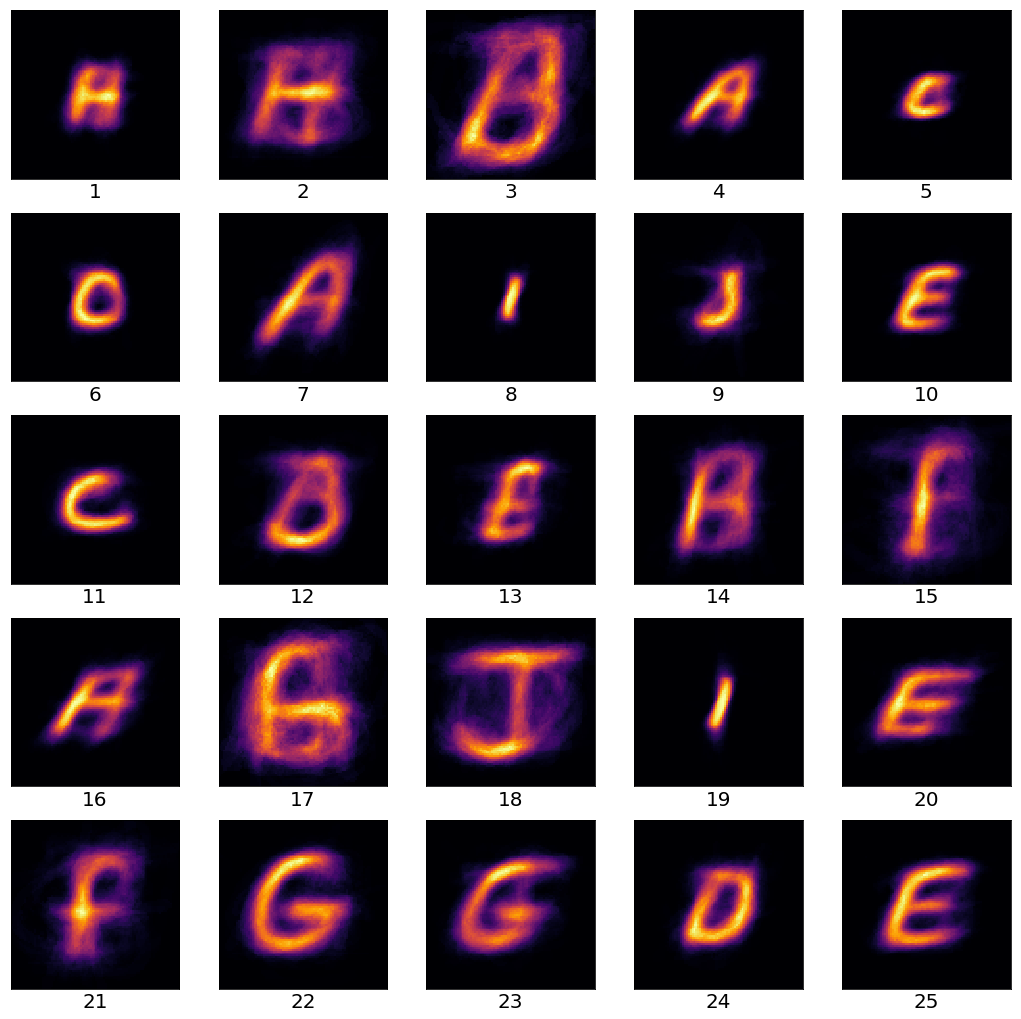

In [16]:
# Plot all prototypes

columns = 5
rows = math.ceil(neurons / columns)
fig = plt.figure(figsize=(18, 18))
for i in range(0, neurons):
    fig.add_subplot(rows, columns, i+1)
    plt.xlabel(i+1, fontsize=20)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(W[i,:].reshape((88,88), order = 'F'),interpolation = 'nearest', cmap='inferno')
plt.show()

In [17]:
corr = np.corrcoef(W)
print(corr)

[[1.         0.6400208  0.29149365 0.84500052 0.78870417 0.83506034
  0.70408441 0.47287882 0.74448487 0.87162931 0.67533516 0.48338504
  0.76729357 0.69876217 0.59085605 0.82081703 0.37814795 0.20373866
  0.48096243 0.7433762  0.69003877 0.36403312 0.47405026 0.72175275
  0.60431121]
 [0.6400208  1.         0.50228499 0.60691307 0.45159595 0.45411361
  0.60248572 0.31313624 0.50546989 0.50871391 0.4699688  0.65219217
  0.56141446 0.77791817 0.53120069 0.7277914  0.710248   0.53834231
  0.3240164  0.74949569 0.60969108 0.74028053 0.71368871 0.59523792
  0.70540277]
 [0.29149365 0.50228499 1.         0.31264486 0.17732728 0.19386005
  0.54360081 0.0545231  0.13906805 0.25182079 0.26129375 0.48592739
  0.24239115 0.60078107 0.42317734 0.47038165 0.56020841 0.48938719
  0.04510363 0.39309034 0.47699959 0.32279308 0.30848652 0.35996434
  0.42906687]
 [0.84500052 0.60691307 0.31264486 1.         0.75130484 0.70060311
  0.81261491 0.47908237 0.69672789 0.78457116 0.48773554 0.5387159
  0.706

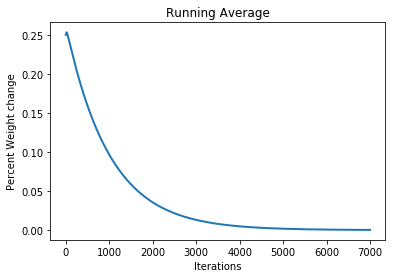

In [18]:
# Plot running average
plt.plot(wCount[0,0:tmax], linewidth=2.0, label='rate')
plt.title("Running Average")
plt.xlabel("Iterations")
plt.ylabel("Percent Weight change")

plt.show()

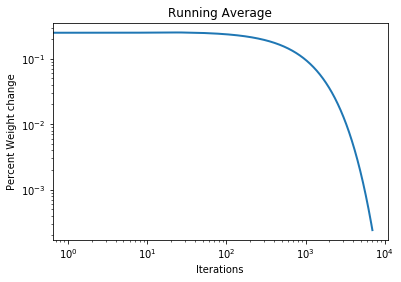

In [19]:
# Plot running average
plt.plot(wCount[0,0:tmax], linewidth=2.0, label='rate')
plt.title("Running Average")
plt.xlabel("Iterations")
plt.ylabel("Percent Weight change")
plt.xscale('log')
plt.yscale('log')

plt.show()